## 딥러닝 구조와 레이어(Layer)

## 딥러닝 모델

In [1]:
from tensorflow.keras import models, utils, layers

### Sequential API
------
- Sequential API를 이용하는 방법은 모델이 순차적인 구조로 진행할 때 사용하는 간단한 방법입니다. 다만 이 방법은 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없습니다.

- Sequential API를 이용한 방법 중 첫번째는 `Sequential` 객체 생성 후, `add()`를 이용하여 사용할 레이어들을 추가하는 방법입니다.

In [2]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 300)           8700      
_________________________________________________________________
dense_1 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_2 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


`plot_model()` 함수를 통해 딥러닝 모델의 모습을 시각적으로 확인할 수 있습니다.

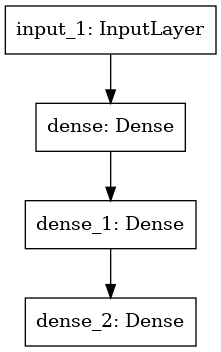

In [3]:
utils.plot_model(model)

In [4]:
# Sequential 인자에 한번에 추가하는 방법
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


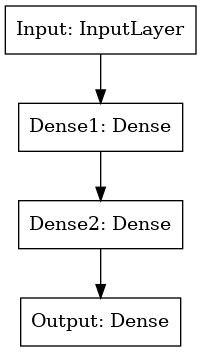

In [5]:
utils.plot_model(model)

### Functional API
------
- 모델 생성에 Functional API를 이용하는 방법은 가장 권장되는 방법입니다. Functional API는 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능하며, 다중 입출력을 다룰 수 있습니다.

In [6]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


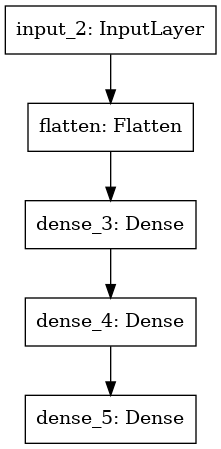

In [7]:
utils.plot_model(model)

- Functional API를 이용하면 Input 객체를 여러 레이어에서 사용하는 것이 가능합니다. 
- 아래의 예제에서는 Concatenate()를 이용하여 Dense 레이어 결과와 Input을 결합하였습니다.

In [8]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

inputs = Input(shape=(28, 28))
hidden1 = Dense(100, activation='relu')(inputs)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([inputs, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 28, 100)      2900        input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 28, 30)       3030        dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_3[0][0]                    
                                                                 dense_7[0][0]              

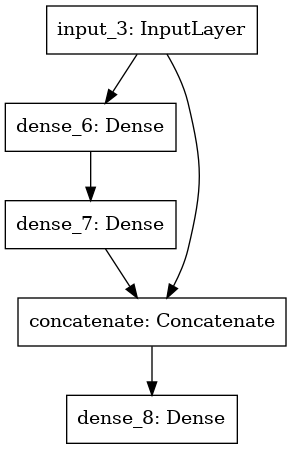

In [9]:
utils.plot_model(model)

- Functional API를 이용하면 여러 Input 객체를 사용하는 것도 가능합니다.

In [10]:
input_1 = Input(shape=(10, 10), name='Input_1')
input_2 = Input(shape=(10, 28), name='Input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 10, 100)      2900        Input_2[0][0]                    
__________________________________________________________________________________________________
Input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 10, 10)       1010        dense_9[0][0]                    
____________________________________________________________________________________________

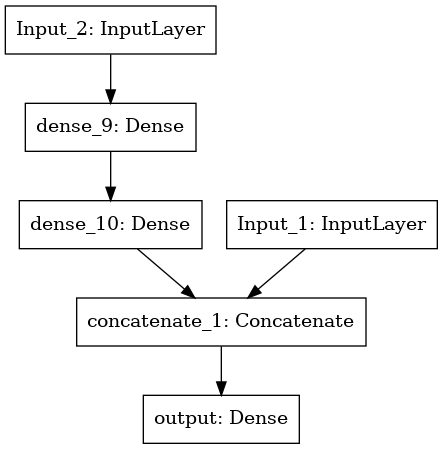

In [11]:
utils.plot_model(model)

In [13]:
# Functional API를 이용하면 결과를 여러개로 나눠서 사용하는 것도 가능
input_ = Input(shape=(10, 10), name='input_')
hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 10, 10)       1010        dense_11[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_12[0][0]                   
____________________________________________________________________________________________

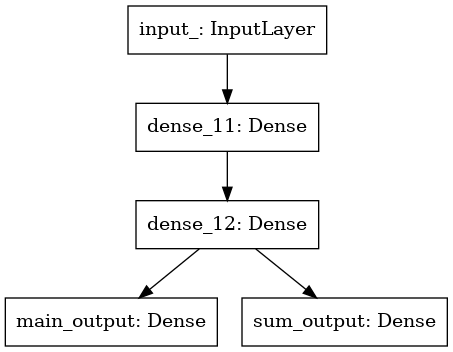

In [14]:
utils.plot_model(model)

In [15]:
# Functional API를 이용하여 다중 입력과 다중 출력이 가능한 모델도 만들 수 있습니다.
input_1 = Input(shape=(10, 10), name='input_1')
input_2 = Input(shape=(10, 28), name='input_2')
hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 10, 10)       1010        dense_13[0][0]                   
____________________________________________________________________________________________

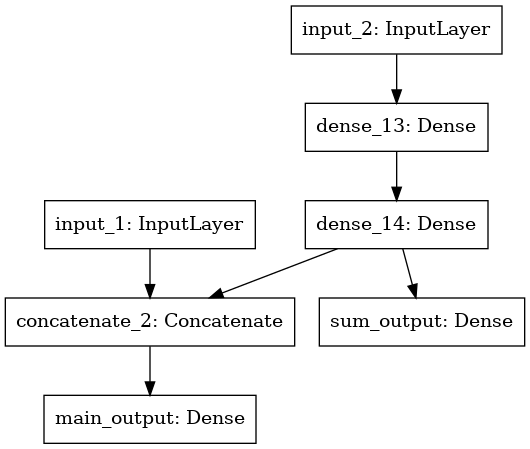

In [16]:
utils.plot_model(model)

## Subclassing API
----
서브클래싱(Subclassing) 방법은 커스터마이징에 최적화된 방법으로, Model 클래스를 상속받아서 사용하고 모델에 포함되는 다음과 같은 기능을 사용할 수 있습니다.

- `fit()`: 모델 학습
- `evaluate()`: 모델 평가
- `predict()`: 모델 예측
- `save()`: 모델 저장
- `load()`: 모델 불러오기
- `call()`: 메소드안에서 원하는 계산 가능

Subclassing API를 사용하면 Functional API로도 구현할 수 없는 모델들도 구현이 가능하지만, 객체지향 프로그래밍
(Object-oriented Programming)에 익숙해야 합니다.


In [17]:
# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

## 실습

### Q. 아래 주석을 따라 Seqential API 모델을 완성해 보세요.

In [18]:
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
model.add(layers.Input(shape= (100, 100, 3)))

# Flatten 레이어를 쌓으세요.
model.add(layers.Flatten())

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(400, activation='relu'))

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(200, activation='relu'))

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 400)               12000400  
_________________________________________________________________
dense_16 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


### Q. 아래 주석을 따라 Functional API 모델을 완성해 보세요.

In [19]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape=(100, 100, 3))

# Flatten 레이어를 쌓으세요.
x = layers.Flatten(input_shape=(100, 100, 3))(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation='relu')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation='relu')(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation='softmax')(x)

model = models.Model(inputs = inputs, outputs = x)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 400)               12000400  
_________________________________________________________________
dense_19 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


### Q. 아래 주석을 따라 Subclassing API 모델을 완성해 보세요.

In [20]:
import tensorflow as tf

class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten()
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(400, activation='relu')
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation='relu')
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation='softmax')

  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(x, shape=(-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()

Model: "your_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_21 (Dense)             multiple                  12000400  
_________________________________________________________________
dense_22 (Dense)             multiple                  80200     
_________________________________________________________________
dense_23 (Dense)             multiple                  20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten()
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(400, activation='relu')
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation='relu')
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation='softmax')

  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.expand_dims(data, axis=0)
model = YourModel()
output = model(data)

model.summary()


Model: "your_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_24 (Dense)             multiple                  12000400  
_________________________________________________________________
dense_25 (Dense)             multiple                  80200     
_________________________________________________________________
dense_26 (Dense)             multiple                  20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


### 종합 퀴즈

In [30]:
input_1 = Input(shape=(40), name='input_1')
input_2 = Input(shape=(10), name='input_2')

hidden1 = Dense(100)(input_1)
hidden2 = Dense(100)(input_2)

concat = Concatenate()([hidden1, hidden2])

hidden3 = Dense(40)(concat)
sub_out = Dense(1)(concat)

output = Dense(10)(hidden3)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 100)          4100        input_1[0][0]                    
__________________________________________________________________________________________________
dense_49 (Dense)                (None, 100)          1100        input_2[0][0]                    
___________________________________________________________________________________________

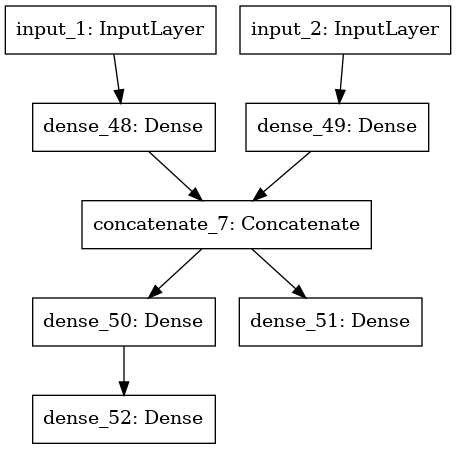

In [31]:
utils.plot_model(model)